# key words
- model selection: cross_val_predict
- regressor: LinearRegression
- plot: probplot

coef: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
intercept: 36.459488385089855
(slope, intercept, r) = (5.55050009406207, 0.03643470509170243, 0.9397036433372761)


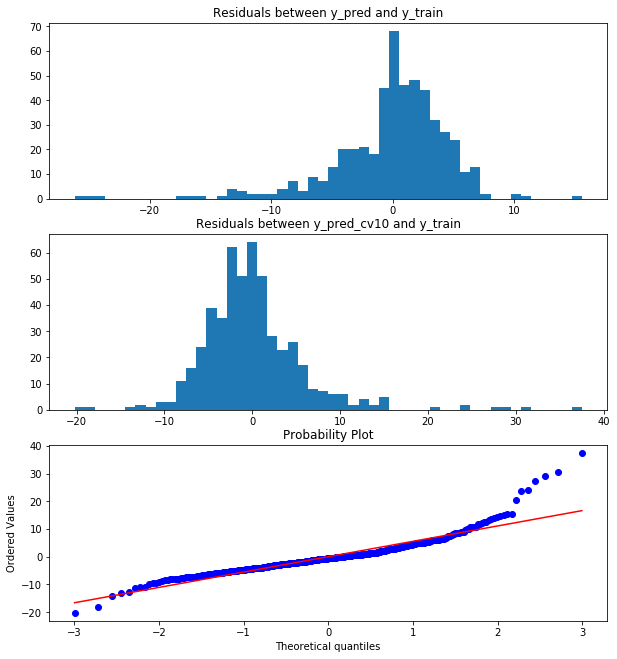

In [1]:
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression


boston = datasets.load_boston()
X_train = boston.data
y_train = boston.target

lr = LinearRegression()
lr.fit(X_train, y_train)
print("coef:", lr.coef_)
print("intercept:", lr.intercept_)

y_pred = lr.predict(X_train)
# y = wx + b, w -> lr.coef_; b -> lr.intercept_
# print(np.sum(lr.coef_ * X_train[0]) + lr.intercept_ == y_pred[0])

y_pred_cv10 = cross_val_predict(lr, X_train, y_train, cv=10)

# plot
plt.figure(figsize=(10, 11))
plt.subplot(3, 1, 1, title="Residuals between y_pred and y_train")
plt.hist(y_pred - y_train, bins=50)

plt.subplot(3, 1, 2, title="Residuals between y_pred_cv10 and y_train")
plt.hist(y_train - y_pred_cv10, bins=50)

plt.subplot(3, 1, 3, title="Probility Plot", xlabel="Theoretical quantities", ylabel="Ordered values")
tuple_out = probplot(y_train - y_pred_cv10, plot=plt)
# tuple_out[1] - (slope, intercept, r)
# slope and intercept come from the least-squares fit
# r is the square root of the coefficient of determination
print("(slope, intercept, r) =", tuple_out[1])

plt.show()